In [2]:
from Clarinet.melodyextraction.noBERT.song2graph import song2graph
from Clarinet.utils.convert import midi2text
from Clarinet.search import similarity
import os
import pandas as pd
from matplotlib import pyplot as plt
import random
from tqdm import tqdm
import numpy as np

In [2]:
pitch_map = {
    12: "C",
    13: "C#",
    14: "D",
    15: "D#",
    16: "E",
    17: "F",
    18: "F#",
    19: "G",
    20: "G#",
    21: "A",
    22: "A#",
    23: "B"
    }
def get_pitch_name(pitch):
    num = pitch % 12
    return pitch_map[num + 12]

In [3]:
def dropRest(melody):
    new_melody = []
    for i in range(len(melody)):
        if melody[i] != 129:
            new_melody.append(melody[i])
    return new_melody

In [10]:
def loadWeight(numpy_folder):
    #return np.load(numpy_folder+"/weight.npy")
    return np.load(numpy_folder+"/melodic.npy")

weights = loadWeight("Data/Numpy/noBERT")
weights = -1 * weights

In [11]:
def evaluate(midi_file):
    actual=midi2text(midi_file)
    g=song2graph(midi_file,weights)
    melody = g.melody()
    melody = dropRest(melody)
    predicted = [get_pitch_name(pitch) for pitch in melody]
    predicted="".join(predicted)

    return(similarity(predicted,actual),predicted,actual)

In [12]:
def evaluateFolder(midi_folder,num_files=-1):
    files=sorted([f"{midi_folder}/{filename}" for filename in os.listdir(midi_folder)])
    if num_files==-1:
        num_files=len(files)
    df=pd.DataFrame(columns=["Filename","Score","Predicted","Actual"])
    for i in tqdm(range(num_files)):
        file=files[i]
        score,predicted,actual=evaluate(file)
        df=df.append({"Filename":file,"Score":score,"Predicted":predicted,"Actual":actual},ignore_index=True)
    return(df)

P
                                           Filename  Score Predicted  \
0  Data/MIDI/Collection/Original Collection/001.mid    1.0        A#   
1  Data/MIDI/Collection/Original Collection/002.mid    1.0        A#   

                                              Actual  
0  C#D#F#G#A#F#D#G#G#FC#F#C#D#F#G#A#F#D#G#C#G#F#F...  
1  D#C#D#C#D#BA#BC#BA#BA#BBA#G#A#D#C#D#C#D#G#F#C#...  


,Score
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


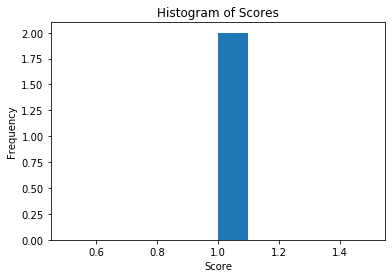

In [22]:
print("P")
df=pd.read_csv("Results/Melody/results_p.csv")

print(df.head())
# plot histogram of scores
plt.hist(df["Score"])
# label hist
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram of Scores")

df_stats=df.describe()
df_stats.drop(df_stats.index[0])


W


100%|██████████| 10/10 [01:38<00:00,  9.82s/it]


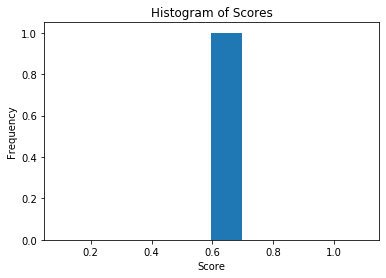

In [43]:
# midi_folder="/Users/kshitij1/Documents/GitHub/Clarinet/Data/Midi/Collection/Original Collection"
# df=evaluateFolder(midi_folder,num_files=20)

print("W")
df=pd.read_csv("Results/Melody/results_w.csv")
# print(df.head())
# print  predicted, actual of first row of df
predicted=df.iloc[0]['Predicted']
# plot histogram of scores
plt.hist(df["Score"])
# label hist
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.title("Histogram of Scores")

df_stats=df.describe()
df_stats.drop(df_stats.index[0])

test_df=pd.DataFrame(columns=["Filename","Score"])
text_folder="Data/Text/Collection/Original Collection"
files=sorted([f"{text_folder}/{filename}" for filename in os.listdir(text_folder)])
for i in tqdm(range(10)):
    file=files[i]
    with open(file,"r") as f:
        actual=f.read()
    score=similarity(predicted,actual)
    test_df=test_df.append({"Filename":file,"Score":score},ignore_index=True)
    # Sort test_df descending
test_df=test_df.sort_values(by=["Score"],ascending=False)

In [44]:
test_df

,Filename,Score
0,Data/Text/Collection/Original Collection/001.txt,0.596737
8,Data/Text/Collection/Original Collection/009.txt,0.561772
1,Data/Text/Collection/Original Collection/002.txt,0.510490
3,Data/Text/Collection/Original Collection/004.txt,0.470862
7,Data/Text/Collection/Original Collection/008.txt,0.433566
5,Data/Text/Collection/Original Collection/006.txt,0.391608
6,Data/Text/Collection/Original Collection/007.txt,0.351981
2,Data/Text/Collection/Original Collection/003.txt,0.335664
9,Data/Text/Collection/Original Collection/010.txt,0.261072
4,Data/Text/Collection/Original Collection/005.txt,0.258741
